Mineral Processing Technology

Smallest Circle

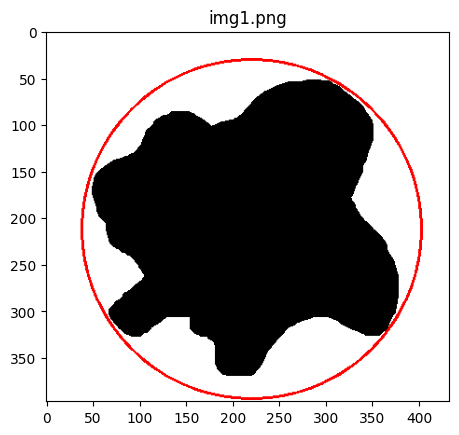

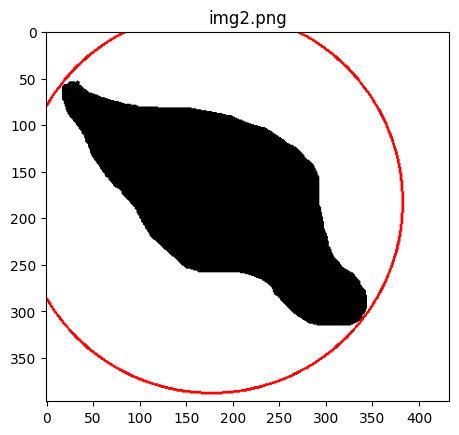

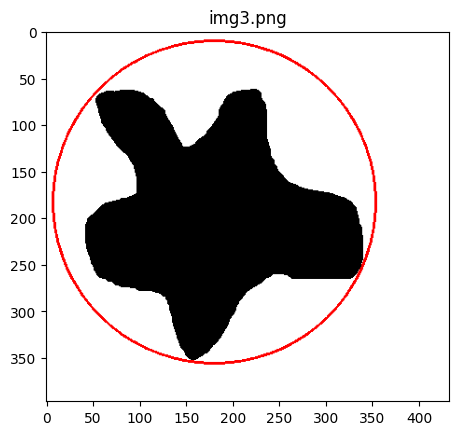

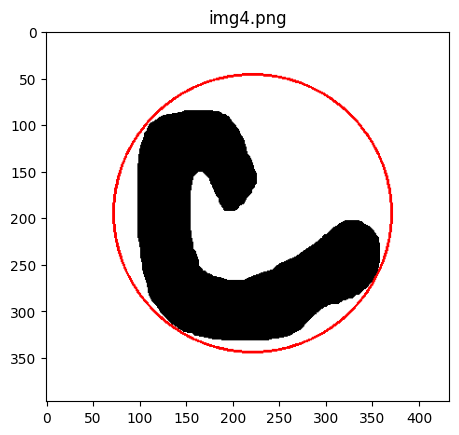

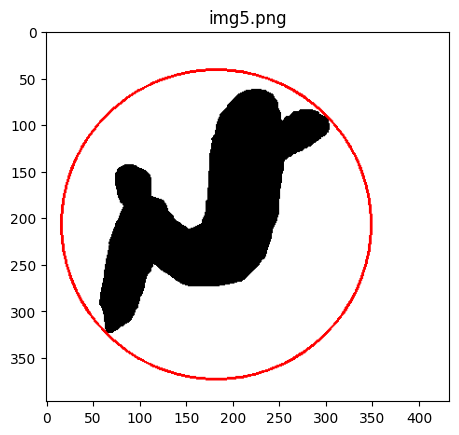

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Input and output directories
input_dir = '../input/'


# Get a list of all files in the input directory
files = os.listdir(input_dir)

for file in files:
    # Check if the file is an image
    if file.endswith('.png') or file.endswith('.jpg'):
        # Load the image in color mode
        image = cv2.imread(os.path.join(input_dir, file))

        # Convert the image to grayscale for thresholding
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Threshold the grayscale image to binary
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

        # Find contours in the binary image
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterate over each contour
        for contour in contours:
            # Find the minimal enclosing circle for each contour
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)

            # Increase the radius by a small factor (e.g., 5%)
            radius = int(radius * 1.018)

            # Draw the circle on the original image in red color
            cv2.circle(image, center, radius, (255, 0, 0), 2)


        # Display the image using matplotlib
        plt.imshow(image, cmap='gray')
        plt.title(f'{file}')
        plt.show()

Total Surface Area

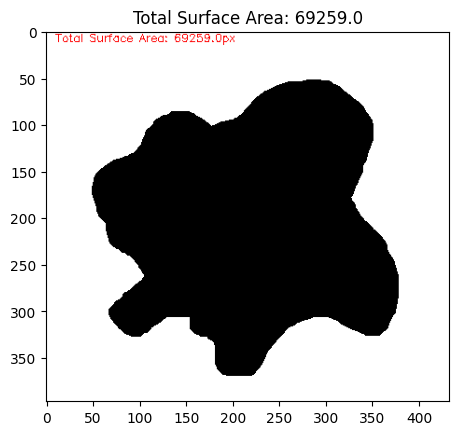

Total surface area: 69259.0 pixels


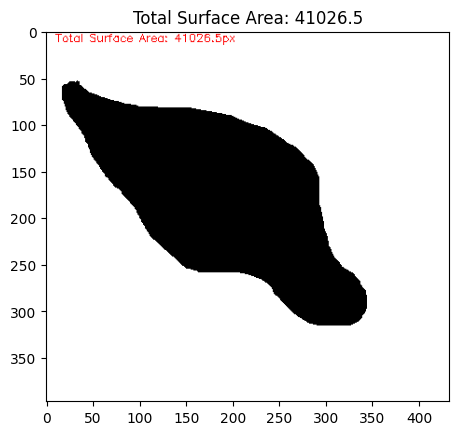

Total surface area: 41026.5 pixels


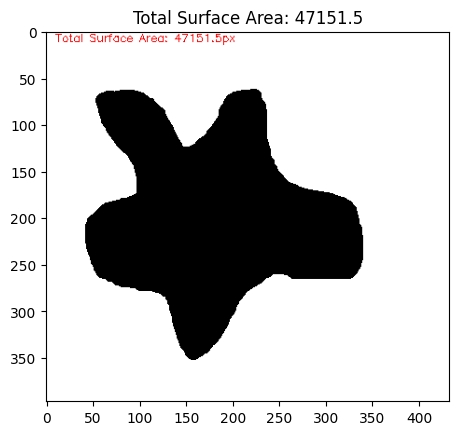

Total surface area: 47151.5 pixels


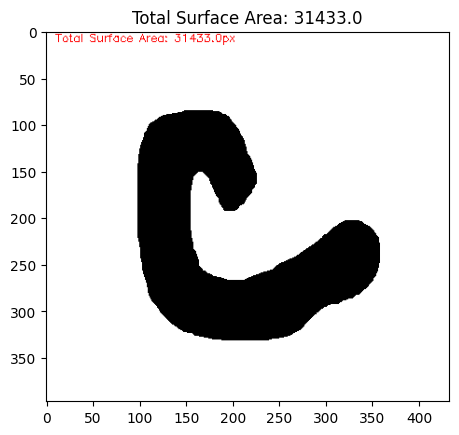

Total surface area: 31433.0 pixels


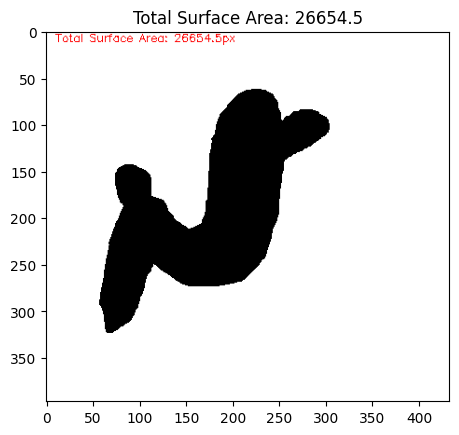

Total surface area: 26654.5 pixels


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Input and output directories
input_dir = '../input/'


# Get a list of all files in the input directory
files = os.listdir(input_dir)

for file in files:
    # Check if the file is an image
    if file.endswith('.png') or file.endswith('.jpg'):
        # Load the image
        image = cv2.imread(os.path.join(input_dir, file), 0)

        # Threshold the image to binary using Otsu's method
        # Invert it so that the object is white and the background is black
        _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Find contours in the binary image
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate the total surface area
        total_area = 0
        for contour in contours:
            area = cv2.contourArea(contour)
            total_area += area

        # Calculate font scale based on image dimensions
        font_scale = min(image.shape[0], image.shape[1]) / 1000  # Adjust denominator to change font size

        # Convert grayscale image to colored
        image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Write the length of the major axis on the image with adjusted font scale and reduced thickness
        cv2.putText(image_colored, f'Total Surface Area: {total_area}px', (10, int(30 * font_scale)),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), 1)  # Make the text red



        # Display the image with text using matplotlib
        plt.imshow(cv2.cvtColor(image_colored, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
        plt.title(f'Total Surface Area: {total_area}')
        plt.show()

        print(f'Total surface area: {total_area} pixels')


Major Axis Length

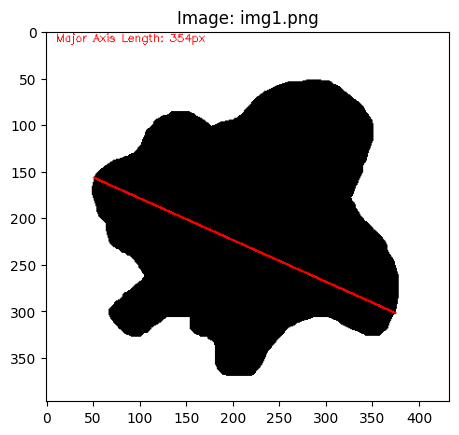

Major Axis Length 354


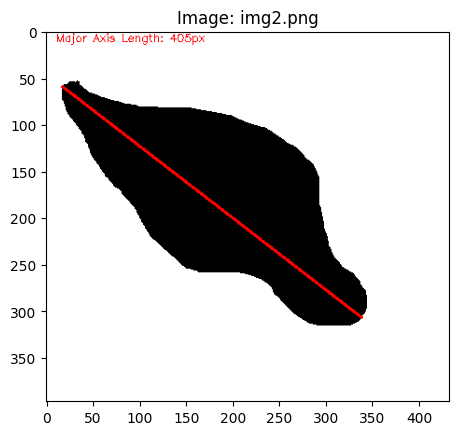

Major Axis Length 405


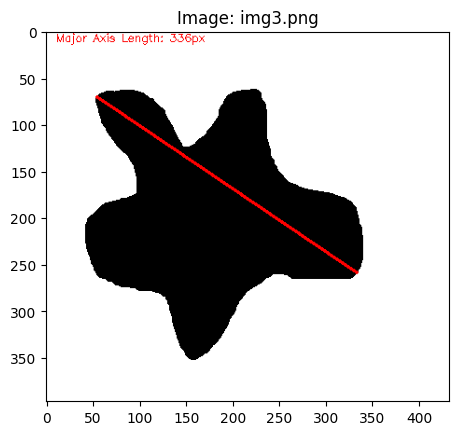

Major Axis Length 336


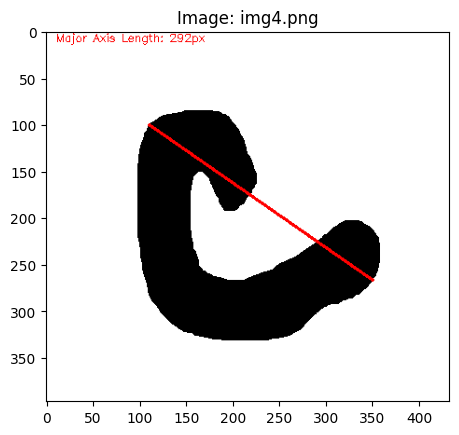

Major Axis Length 292


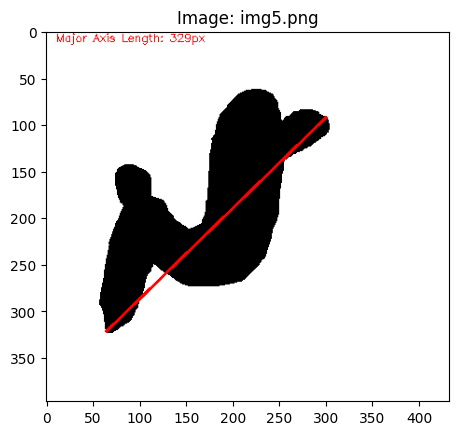

Major Axis Length 329


In [4]:
import cv2
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import os

# Input and output directories
input_dir = '../input/'


# Get a list of all files in the input directory
files = os.listdir(input_dir)

for file in files:
    # Check if the file is an image
    if file.endswith('.png') or file.endswith('.jpg'):
        # Load the image in grayscale
        image_gray = cv2.imread(os.path.join(input_dir, file), 0)

        # Convert the grayscale image to color
        image_color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

        # Invert the grayscale image
        image_gray = 255 - image_gray

        # Threshold the inverted image
        _, thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

        # Find contours in the thresholded image
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Reshape the largest contour to a 2D array
        largest_contour_reshaped = largest_contour.reshape(-1, 2)

        # Compute Euclidean distance between all points in the contour and find the maximum
        distances = distance.cdist(largest_contour_reshaped, largest_contour_reshaped, 'euclidean')
        max_distance = np.unravel_index(np.argmax(distances), distances.shape)

        # Get the points corresponding to the maximum distance
        point1 = tuple(largest_contour_reshaped[max_distance[0]])
        point2 = tuple(largest_contour_reshaped[max_distance[1]])

        # Draw a line between these points on the color image with reduced thickness
        cv2.line(image_color, point1, point2, (0, 0, 255), 2)  # Change last parameter to reduce line thickness

        # Calculate the length of the line (major axis)
        major_axis_length = int(distances[max_distance])


        # Calculate font scale based on image dimensions
        font_scale = min(image_color.shape[0], image_color.shape[1]) / 1000  # Adjust denominator to change font size

        # Write the length of the major axis on the image with adjusted font scale and reduced thickness
        cv2.putText(image_color, f'Major Axis Length: {major_axis_length}px', (10, int(30 * font_scale)),
                    cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), 1)  # Change last parameter to reduce text thickness

        # Display the image with line and text using matplotlib
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {file}')
        plt.show()
        print(f'Major Axis Length {major_axis_length}')


Perimeter

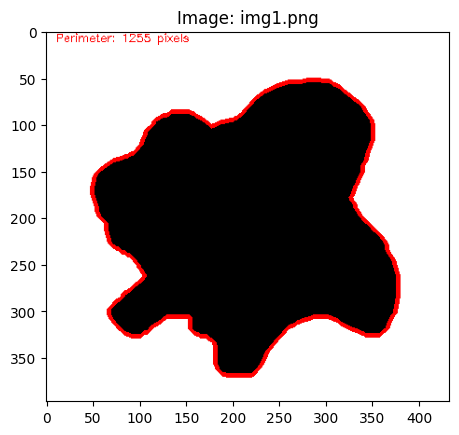

Perimeter 1255


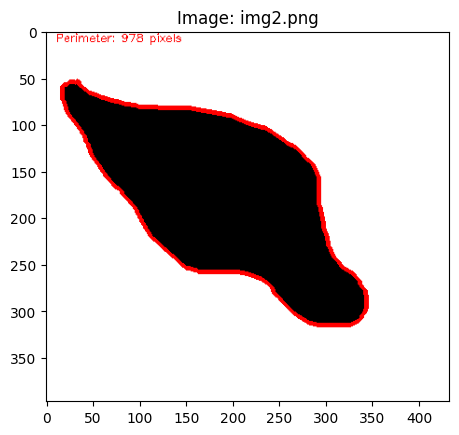

Perimeter 978


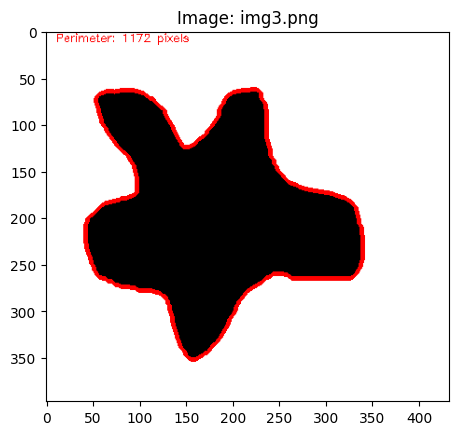

Perimeter 1172


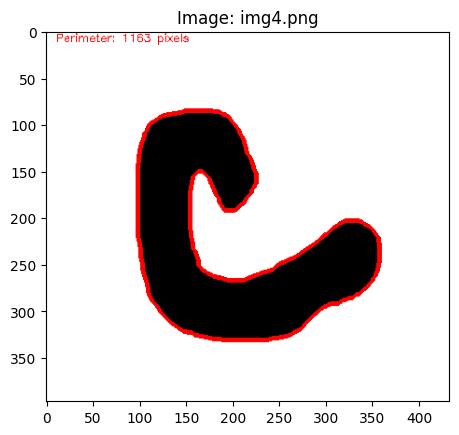

Perimeter 1163


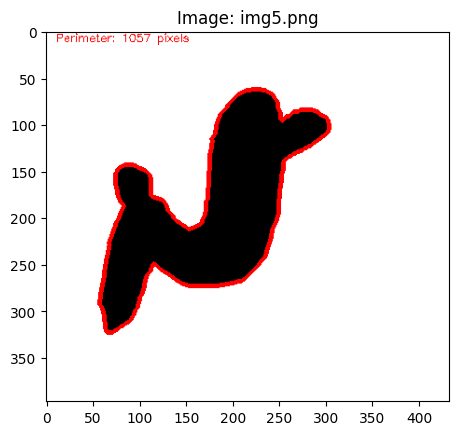

Perimeter 1057


In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Get a list of all files in the directory
input_dir = '../input/'

files = os.listdir(input_dir)

for file in files:
    # Check if the file is an image
    if file.endswith('.png') or file.endswith('.jpg'):
        # Load the image
        image = cv2.imread(os.path.join(input_dir, file), 0)

        # Threshold the image
        _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

        # Find contours in the binary image
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on a color version of the original image
        image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(image_color, contours, -1, (0, 0, 255), 3)

        # Calculate the perimeter
        perimeter = int(cv2.arcLength(contours[0], True))


        # Calculate font scale based on image size
        font_scale = min(image_color.shape[0], image_color.shape[1])/1000

        # Write the perimeter on the image
        cv2.putText(image_color, f'Perimeter: {perimeter} pixels', (10, int(30 * font_scale)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), 1)

        # Display the result using matplotlib
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {file}')
        plt.show()
        print(f'Perimeter {perimeter}')


Centroid

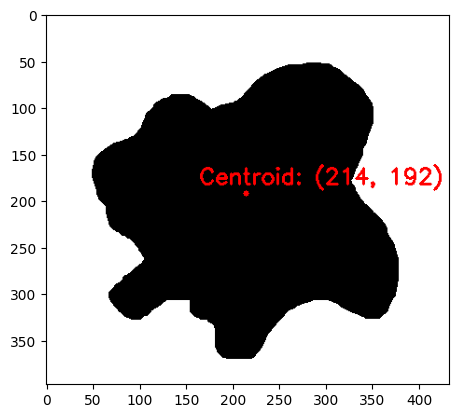

Centroid coordinates:  214 192


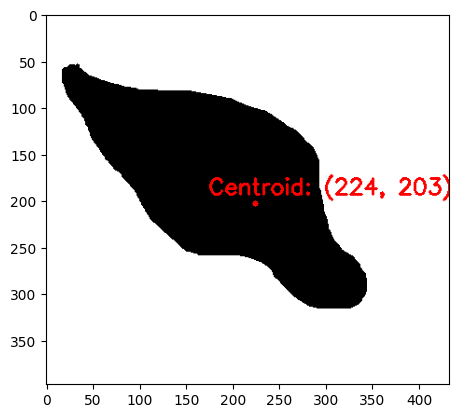

Centroid coordinates:  224 203


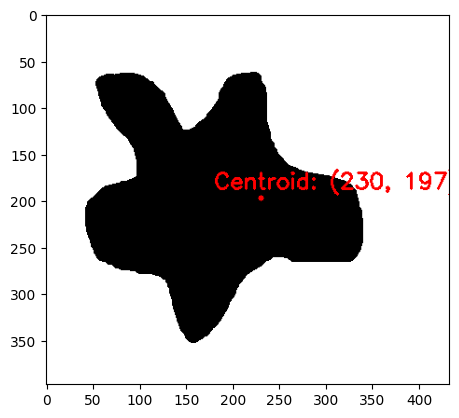

Centroid coordinates:  230 197


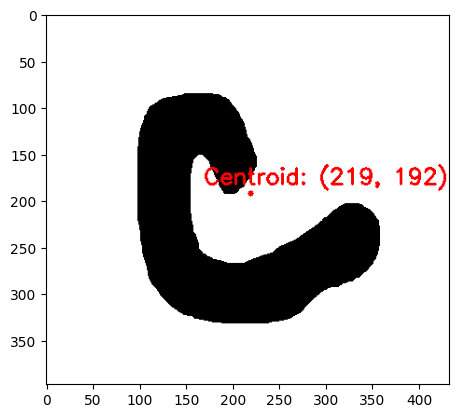

Centroid coordinates:  219 192


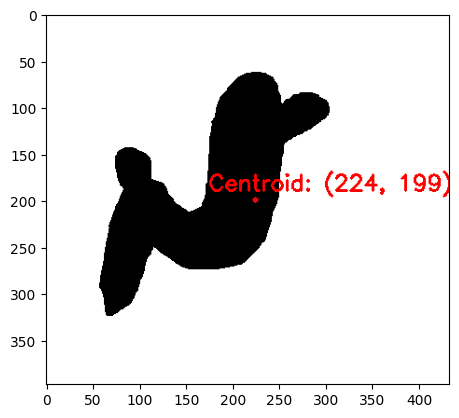

Centroid coordinates:  224 199


In [10]:
import cv2
import os
from matplotlib import pyplot as plt

# Get a list of all files in the directory
input_dir = '../input/'
files = os.listdir(input_dir)

for file in files:
    # Check if the file is an image
    if file.endswith('.png') or file.endswith('.jpg'):
        # Load the image
        image = cv2.imread(os.path.join(input_dir, file), 0)

        # Convert the grayscale image to color.
        image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Calculate the moments of the image
        M = cv2.moments(image)

        # Calculate x, y coordinate of centroid
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Draw a red point at the centroid
        cv2.circle(image_color, (cX, cY), 3, (0, 0, 255), -1)

        # Calculate font scale
        font_scale = min(image.shape[0], image.shape[1]) / (25 * len(f"Centroid: ({cX}, {cY})"))

        # Write the coordinates on the image
        cv2.putText(image_color, f"Centroid: ({cX}, {cY})", (cX - 50, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale,
                    (0, 0, 255), 2)

        # Display the image
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.show()
        print("Centroid coordinates: ", cX, cY)
